In [148]:
#importing common functions
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy


from scipy import stats

### Problem 1.
#### A) 
First, we set up the poisson probability mass function (PMF) using stats.poisson.pmf,   
with background cosmic ray noise values (X) from 0 to 15, and a hypothetical average of **5.432**.    
Then, with each additional day, we take the previous day's PMF and the initial PMF,  
use np.convolve, to integrate result of all days. X values are also increased accordingly.  
The results are plotted below:

In [149]:
#picking a hypothetical average cosmic-ray background:
x_background = 5.432

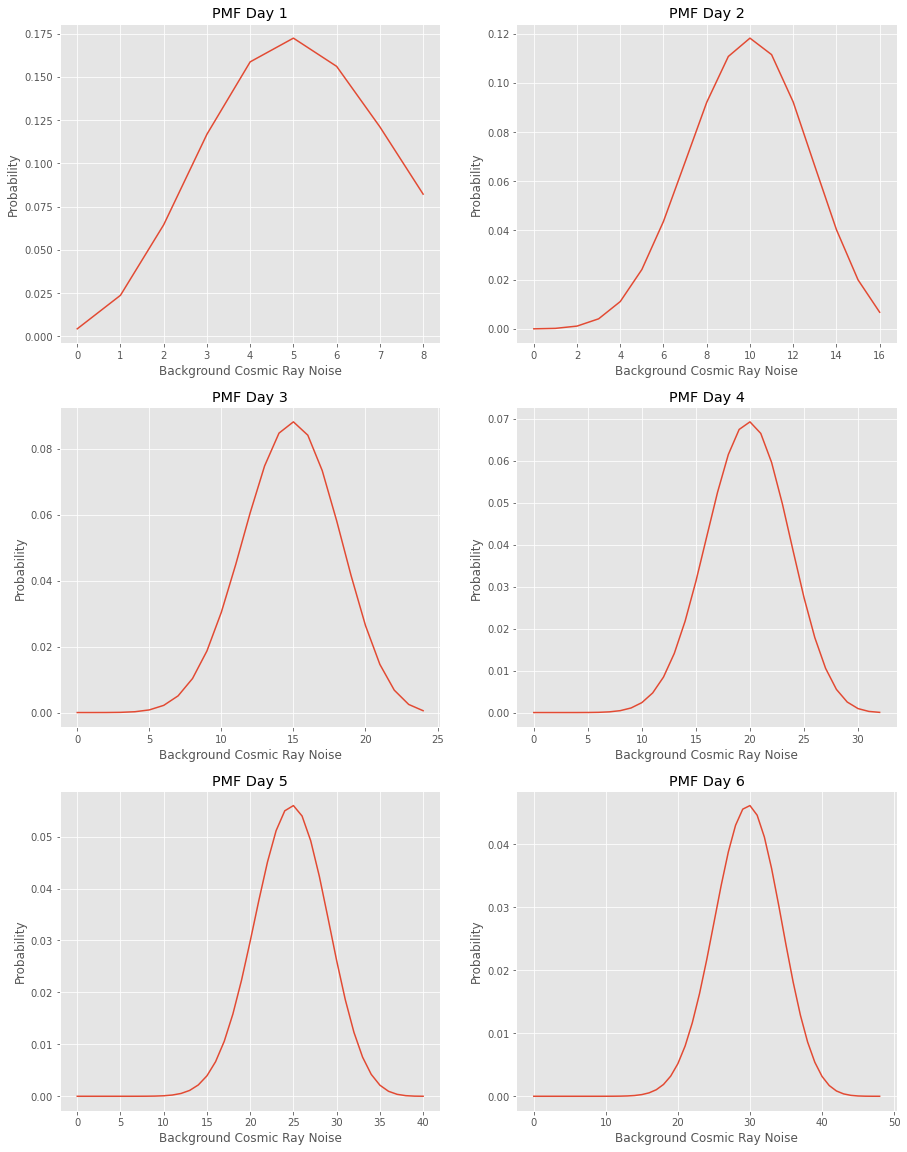

In [150]:
plt.rcParams["figure.figsize"] = (15,20)
plt.style.use('ggplot')

fig, ax = plt.subplots(3, 2)

n_terms = 8
x1 = np.arange(0,n_terms+1)

y_poi1 = stats.poisson.pmf(x1, x_background)
ax[0,0].plot(x1, y_poi1)
ax[0,0].set_title('PMF Day 1')
ax[0,0].set_xlabel("Background Cosmic Ray Noise")
ax[0,0].set_ylabel("Probability")

x2 = np.arange(0,n_terms*2+1)
y_poi2 = np.convolve(y_poi1, y_poi1)
ax[0,1].plot(x2, y_poi2)
ax[0,1].set_title('PMF Day 2')
ax[0,1].set_xlabel("Background Cosmic Ray Noise")
ax[0,1].set_ylabel("Probability")

x3 = np.arange(0,n_terms*3+1)
y_poi3 = np.convolve(y_poi2, y_poi1)
ax[1,0].plot(x3, y_poi3)
ax[1,0].set_title('PMF Day 3')
ax[1,0].set_xlabel("Background Cosmic Ray Noise")
ax[1,0].set_ylabel("Probability")

x4 = np.arange(0,n_terms*4+1)
y_poi4 = np.convolve(y_poi3, y_poi1)
ax[1,1].plot(x4, y_poi4)
ax[1,1].set_title('PMF Day 4')
ax[1,1].set_xlabel("Background Cosmic Ray Noise")
ax[1,1].set_ylabel("Probability")

x5 = np.arange(0,n_terms*5+1)
y_poi5 = np.convolve(y_poi4, y_poi1)
ax[2,0].plot(x5, y_poi5)
ax[2,0].set_title('PMF Day 5')
ax[2,0].set_xlabel("Background Cosmic Ray Noise")
ax[2,0].set_ylabel("Probability")

x6 = np.arange(0,n_terms*6+1)
y_poi6 = np.convolve(y_poi5, y_poi1)
ax[2,1].plot(x6, y_poi6)
ax[2,1].set_title('PMF Day 6');
ax[2,1].set_xlabel("Background Cosmic Ray Noise")
ax[2,1].set_ylabel("Probability");


#### B)  
At Day 5, the sum of the PMF is shown below, in blue lines.  
As it is the sum over 5 days, it is expected to have a mean of 5.432 * 5 = 27.160.   
Thus, a generated Poisson distribution with average 27.160 over the same background values is shown in orange. 

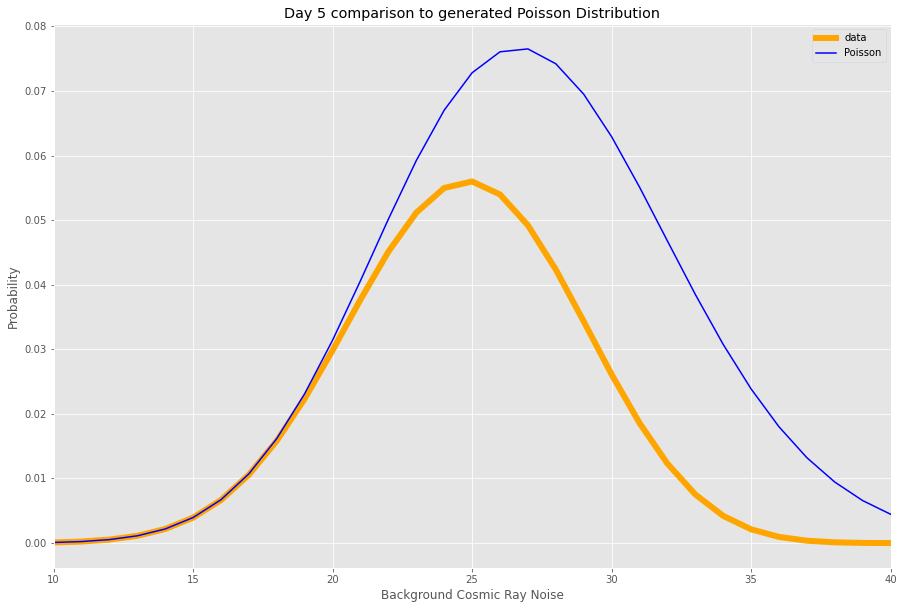

In [151]:
plt.rcParams["figure.figsize"] = (15,10)

fig, ax = plt.subplots(1,1)

ax.set_title("Day 5 comparison to generated Poisson Distribution")
ax.set_xlabel("Background Cosmic Ray Noise")
ax.set_ylabel("Probability")
ax.set_xlim(10,40)
ax.plot(x5, y_poi5, label = "data", linewidth = 6, color = "orange")
ax.plot(x5, stats.poisson.pmf(x5, x_background*5), label = "Poisson", color = "b")
                       
ax.legend();

As shown, the 5 day sum is no longer a Poisson Distribution.  
Mathematically, convolution of 5 Poisson function $$\!f(k, \lambda)= \frac{\lambda^k e^{-\lambda}}{k!},$$  
would no longer yield a Poisson function, due to the nature of convolution integrals.

Conceptually, due to Central Limits theorem, the sum of any distribution would tend towards a Gaussian distribution,  
thus the 5 day sum is no longer a Poisson

#### C)  
The average of 1, 3, 6, 10, and 100 days are plotted below.  
For each function, the sum function is taken and X values are shrunk by  
their days to get the average function.   

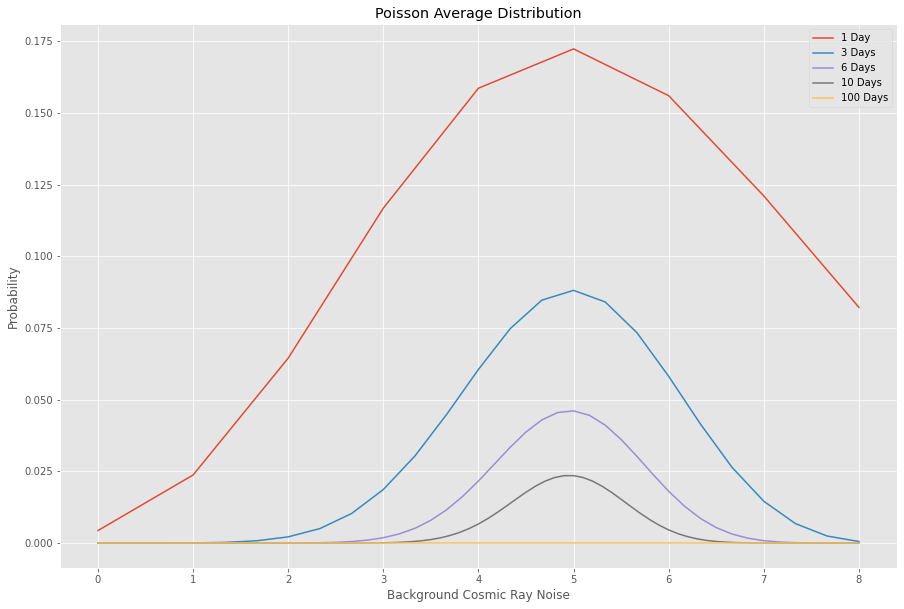

In [152]:
#setting an arbitrary mean:
x_mean = 4.325

plt.rcParams["figure.figsize"] = (15,10)

fig, ax = plt.subplots(1,1)

x_moy = np.linspace(stats.moyal.ppf(0.01),
                stats.moyal.ppf(0.99), 100)

ax.set_title("Poisson Average Distribution")
ax.set_xlabel("Background Cosmic Ray Noise")
ax.set_ylabel("Probability")

x1 = np.arange(0,n_terms+1)

y_moy1 = stats.moyal.pdf(x1, x_background)

ax.plot(x1/1, y_poi1,label = "1 Day")
ax.plot(x3/3, y_poi3,label = "3 Days")
ax.plot(x6/6, y_poi6,label = "6 Days");

y_poi10 = y_poi1
for i in range(10-1):
    y_poi10 = np.convolve(y_poi1,y_poi10)
ax.plot(np.arange(0,n_terms*10+1)/10, y_poi10,label = "10 Days");

y_poi100 = y_poi1
for i in range(100-1):
    y_poi100 = np.convolve(y_poi1,y_poi100)
ax.plot(np.arange(0,n_terms*100+1)/100, y_poi100,label = "100 Days");

                       
ax.legend();

As shown above, the average functions' mean stays the same, while the   
standard deviation is reduced, by a scale of  $\sqrt{n}$ (n being number of days).   
As stated in B, the integral of Poisson Distribution does yield a Gaussian distribution.

### D)  
If we pick Y = 8, N = 6, then:

In [153]:
p_86 = 0
for i, val in enumerate(y_poi6):
    if (i > 8*6):
        p_86 += val
p_86

0

In [154]:
stats.norm.ppf(1- p_86)

inf

It would be 2.64 $\sigma$

### Problem 2   
In this problem I selected the Moyal Distribution or Landau Distribution, a skewed continuous distribution  
that is commonly used in quantum mechanics. It has the form:  
$$ f(x)= {\frac {1}{\sqrt {2\pi }}}\exp \left(-{\frac {x+e^{-x}}{2}}\right) $$

#### A)  
The distribution sum is shown below with observations from 1, 3, 6, 10, 100 days:

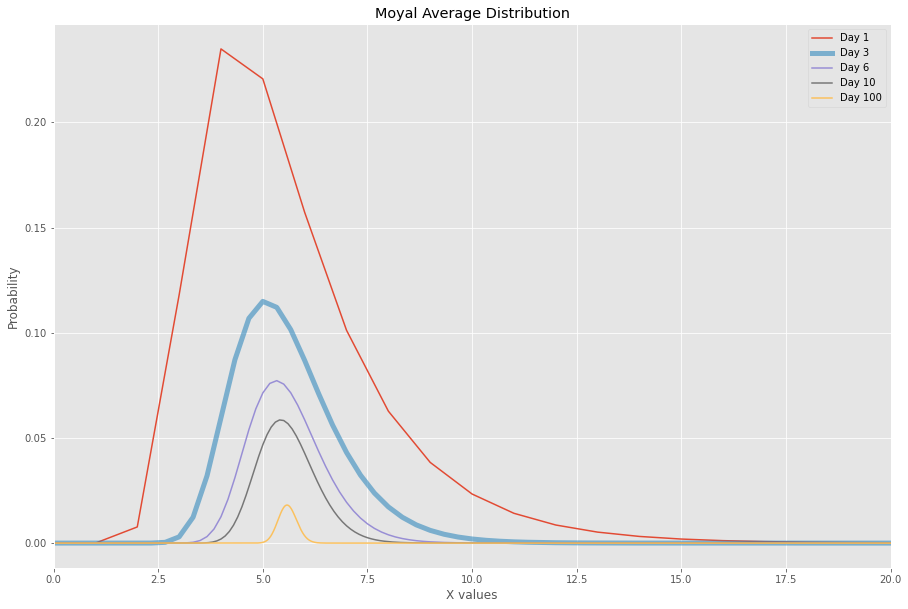

In [155]:
#setting an arbitrary mean:
x_mean = 4.325
x_nvals = 100
plt.rcParams["figure.figsize"] = (15,10)

fig, ax = plt.subplots(1,1)

x_moy = np.arange(0, x_nvals+1)
y_moy1 = stats.moyal.pdf(x_moy, loc = x_mean)
ax.plot(x_moy, y_moy1, label='Day 1')

y_moy2 = np.convolve(y_moy1, y_moy1)
y_moy3 = np.convolve(y_moy2, y_moy1)
x_moy3 = np.arange(0,3* x_nvals+1)
ax.plot(x_moy3/3, y_moy3, lw=5, alpha=0.6, label='Day 3')

y_moy6 = y_moy1
for i in range(6-1):
    y_moy6 = np.convolve(y_moy1,y_moy6)
ax.plot(np.arange(0,x_nvals*6+1)/6, y_moy6,label = "Day 6");

y_moy10 = y_moy1
for i in range(10-1):
    y_moy10 = np.convolve(y_moy1,y_moy10)
ax.plot(np.arange(0,x_nvals*10+1)/10, y_moy10,label = "Day 10");

y_moy100 = y_moy1
for i in range(100-1):
    y_moy100 = np.convolve(y_moy1,y_moy100)
ax.plot(np.arange(0,x_nvals*100+1)/100, y_moy100,label = "Day 100");

ax.set_title("Moyal Average Distribution")
ax.set_xlabel("X values")
ax.set_ylabel("Probability");
ax.set_xlim(0,20)
ax.legend();

#### A) 
On day 1, the distribution is skewed to the left with a unsmooth top. Then,   
the distribution gets narrower, the peak amplitude decreases, and become less skewed as the days increases.

#### B)  
After about 6 intervals, the shape tends towards a Gaussian distribution.

### Problem 3

#### Version 1   
##### A)  
I picked the width of background Gaussian distribution X = **5.1**,  
and a signal strength of Y = **8.2**.

at FWHM of 5.1, the standard deviation is:

In [156]:
sig = 5.1/2.35
sig

2.1702127659574466

And the signifiance is 

In [157]:
8.2/sig

3.7784313725490195

Which is less than 5$\sigma$, so we can't claim a discovery.

#### Version 2   
##### A)  
What is the probability of the background over 10k pixels giving me a data point that looks  
like a signal of at least 8.2?  
As we integrate over 10k pixels, what would the probability distribution looks like?  

In [105]:
v_nvals = 20

x = np.arange(-v_nvals,v_nvals+1)
y_ver1 = stats.norm.pdf(x,loc = 0, scale = sig)

y_ver2 = y_ver1
for i in range(10000-1):
    y_ver2 = np.convolve(y_ver1,y_ver2)  

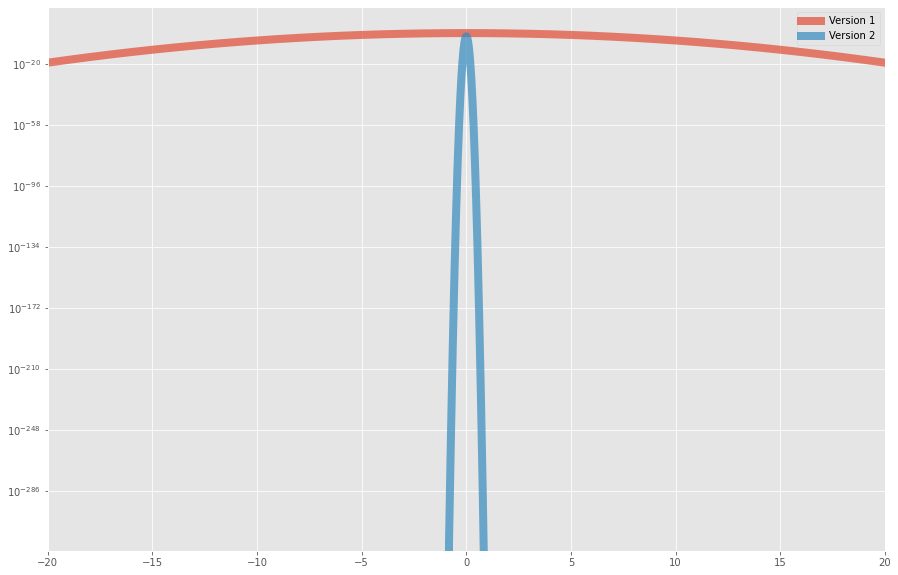

In [158]:
fig, ax = plt.subplots(1, 1)
ax.plot(x,y_ver1,linewidth = 8,alpha = 0.7, label = "Version 1")
ax.plot(np.arange(-v_nvals*10000,v_nvals*10000+1)/10000, y_ver2,linewidth = 8,alpha = 0.7, label = "Version 2");
plt.yscale("log")
plt.xlim(-v_nvals, v_nvals)
ax.legend();
plt.show();

As shown above, the probability distribution would be highly compact,  
thus a signal would be much more significant

#### C)  
In this case, to get a signal of 8.2 would be $\approx 0$

### Problem 4  
#### A)
For a 5$\sigma$ detection in version 1, the signal needs to be:

In [159]:
5* sig

10.851063829787233

#### B)
For a 5$\sigma$ detection in version 2, the signal needs to be:

In [160]:
temp = stats.norm.ppf(stats.norm.cdf(10.85/10000, scale = sig)/10000)
np.abs(temp ) * sig 

8.443202168170059

#### C)  
We need a much brighter signal for a trials factor of 10 K

#### D)  
If we change the factor by orders of magnitude, the 5 $\sigma$ threshold would increase slightly,  
by log of magnitude.

#### E)  
A different distribution would be similar to Gaussian due to the Central Limit theorem at high trial factor.